# Multiple Regression, Clearly Explained!!!

In this notebook, we are going to explore the concept of multiple regression. This is a continuation from the simple linear regression. If you haven't checked the simple linear regression notebook, please do as it forms a basis for this.

Just like simple linear regression where we fit a line to the data, multiple regression involves fitting a plane or some higher-dimensional object to your data. When we say higher-dimensional object, we simply mean that we are adding additional data to the model. The 'additional data' can be additional features in our dataset.

Let's dive in and see how it works.

## Libraries
We will use numpy for computations, pandas for data manipulation and matplotlib and seaborn for data visualization. Statsmodel library will be used for building our model.

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
```

## Load the Data
```python
data = pd.read_csv('data.csv')
```

## Exploratory Data Analysis
```python
data.head()
```

## Fit the Model
We will use the statsmodels library to fit our multiple regression model. In this example, we will be predicting body length using mouse weight and tail length. If we had additional factors like the amount of food eaten or the amount of time spent running on a wheel, we would also consider them in our model.

```python
model = ols('body_length ~ mouse_weight + tail_length', data=data).fit()
```

## Model Summary
```python
model.summary()
```

In the model summary, we are interested in the R-squared value and the p-value. The R-squared value tells us how well our line fits the data while the p-value gives us the significance of our model.

In multiple regression, we adjust the R-squared to compensate for the additional parameters in the equation. The formula for R-squared is given by:

$$R^2 = \frac{SS_{fit}}{SS_{mean}}$$

where $SS_{fit}$ is the sum of squares around the fit and $SS_{mean}$ is the sum of squares around the mean value for the body length.

We can also calculate a p-value for our R-squared. The formula for p-value is given by:

$$F = \frac{(SS_{fit}/P_{fit})}{(SS_{mean}/P_{mean})}$$

where $P_{fit}$ is the number of parameters in the equation that the least-squares have to estimate and $P_{mean}$ is the number of parameters for estimating the mean value of the body length. In this case, $P_{mean}$ will always be 1.

We can also compare the simple regression model and the multiple regression model. This is helpful in determining whether the additional data (features) are worth considering in our model. The formula is similar to that of p-value only that we replace the mean values with the simple regression values.

$$F = \frac{(SS_{multi}/P_{multi})}{(SS_{simple}/P_{simple})}$$

where $SS_{multi}$ and $P_{multi}$ are the sum of squares and number of parameters for the multiple regression and $SS_{simple}$ and $P_{simple}$ are the sum of squares and number of parameters for the simple regression.

If the difference in R-squared values between the simple and multiple regression is big and the p-value is small then adding the additional data to the model is worth the trouble.

Multiple regression is a powerful tool that allows us to predict the value of a variable based on the values of two or more other variables. It's an extension of simple linear regression that allows for predictions with greater accuracy and precision.


## Conclusion
In this notebook, we have seen how to do multiple regression and how to evaluate our model using R-squared and p-value. We have also seen how to compare a simple regression model and a multiple regression model. In the next notebook, we will see how to do multiple regression in R. Stay tuned!!!

## References
1. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.
2. Kutner, M. H., Nachtsheim, C. J., & Neter, J. (2004). Applied linear regression models (4th ed) (No. 04; QA278, .K8 2004.).
3. Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). Introduction to linear regression analysis (Vol. 821). John Wiley & Sons.
4. [StatQuest: Multiple Regression](https://www.youtube.com/watch?v=1hbCJyM9ccs)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Generate random data
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1
X2 = np.random.rand(100) * 10  # Feature 2
y = 3 * X1 + 2 * X2 + np.random.randn(100) * 2  # Target with noise

# Combine X1 and X2 into a feature matrix
X = np.column_stack((X1, X2))

In [3]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -0.17877992709985335
Coefficients: [2.93165494 2.14386228]


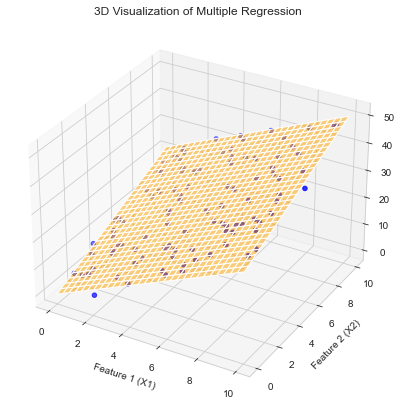

In [4]:
# Create a grid for visualization
X1_grid, X2_grid = np.meshgrid(np.linspace(0, 10, 30), np.linspace(0, 10, 30))
y_pred_grid = (model.intercept_ +
               model.coef_[0] * X1_grid +
               model.coef_[1] * X2_grid)

# Plot the data points and regression plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, y, color='blue', label='Data points')
ax.plot_surface(X1_grid, X2_grid, y_pred_grid, alpha=0.5, color='orange', label='Regression plane')

# Set labels
ax.set_xlabel('Feature 1 (X1)')
ax.set_ylabel('Feature 2 (X2)')
ax.set_zlabel('Target (y)')
ax.set_title('3D Visualization of Multiple Regression')

plt.show()